In [ ]:
 import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import torch
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline
import pandas as pd
from transformers import GPT2Tokenizer, GPT2LMHeadModel, pipeline
from transformers import GPT2LMHeadModel, GPT2Tokenizer, pipeline
from sklearn.preprocessing import LabelEncoder
from transformers import DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
dataset_path = 'results.csv'
dataset = pd.read_csv(dataset_path, sep='|')
dataset = dataset.sample(frac=1.0, replace=False)
dataset.columns = dataset.columns.str.strip()
dataset['image_name'] = dataset['image_name'].str.strip()
dataset['comment_number'] = dataset['comment_number'].str.strip()
dataset['comment'] = dataset['comment'].str.strip()
dataset['comment_number'] = pd.to_numeric(dataset['comment_number'], errors='coerce')
dataset.dropna(subset=['comment_number'], inplace=True)
dataset['comment_number'] = dataset['comment_number'].astype(int)
dataset.dropna(subset=['comment'], inplace=True)
dataset['comment'] = dataset['comment'].str.replace("[^a-zA-Z0-9.,!?\\s]", "", regex=True)
dataset['comment'] = dataset['comment'].str.lower()
print(dataset.head())
print(dataset.info())


           image_name  comment_number  \
91865  4093746088.jpg               0   
52690  3024172109.jpg               0   
48136  2906755876.jpg               1   
742     104835889.jpg               2   
89948  4001021645.jpg               3   

                                                 comment  
91865  this man with a white hard hat , and gray vest...  
52690  there is a boy wearing jeans and a baseball ca...  
48136  white woman and boy sitting around a small whi...  
742    a guy with a sword and traditional fighting ge...  
89948  the wheel of the bus is being held by a person...  
<class 'pandas.core.frame.DataFrame'>
Index: 158914 entries, 91865 to 625
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_name      158914 non-null  object
 1   comment_number  158914 non-null  int64 
 2   comment         158914 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.8+ MB
None


In [ ]:
original_size = len(dataset)

Dataset shape: (158914, 3)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 158914 entries, 91865 to 625
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_name      158914 non-null  object
 1   comment_number  158914 non-null  int64 
 2   comment         158914 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.8+ MB
None
           image_name  comment_number  \
91865  4093746088.jpg               0   
52690  3024172109.jpg               0   
48136  2906755876.jpg               1   
742     104835889.jpg               2   
89948  4001021645.jpg               3   

                                                 comment  
91865  this man with a white hard hat , and gray vest...  
52690  there is a boy wearing jeans and a baseball ca...  
48136  white woman and boy sitting around a small whi...  
742    a guy with a sword and traditional fighting ge...  
89948  the wheel of the bus is 

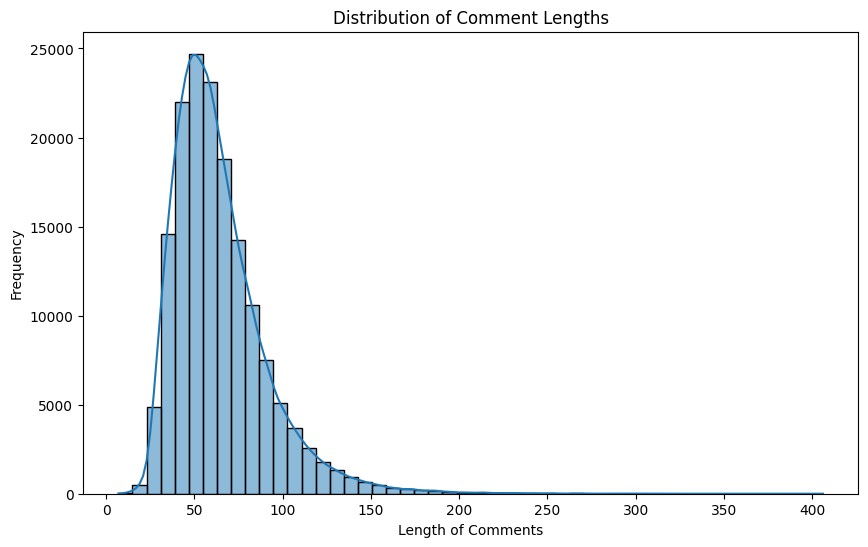

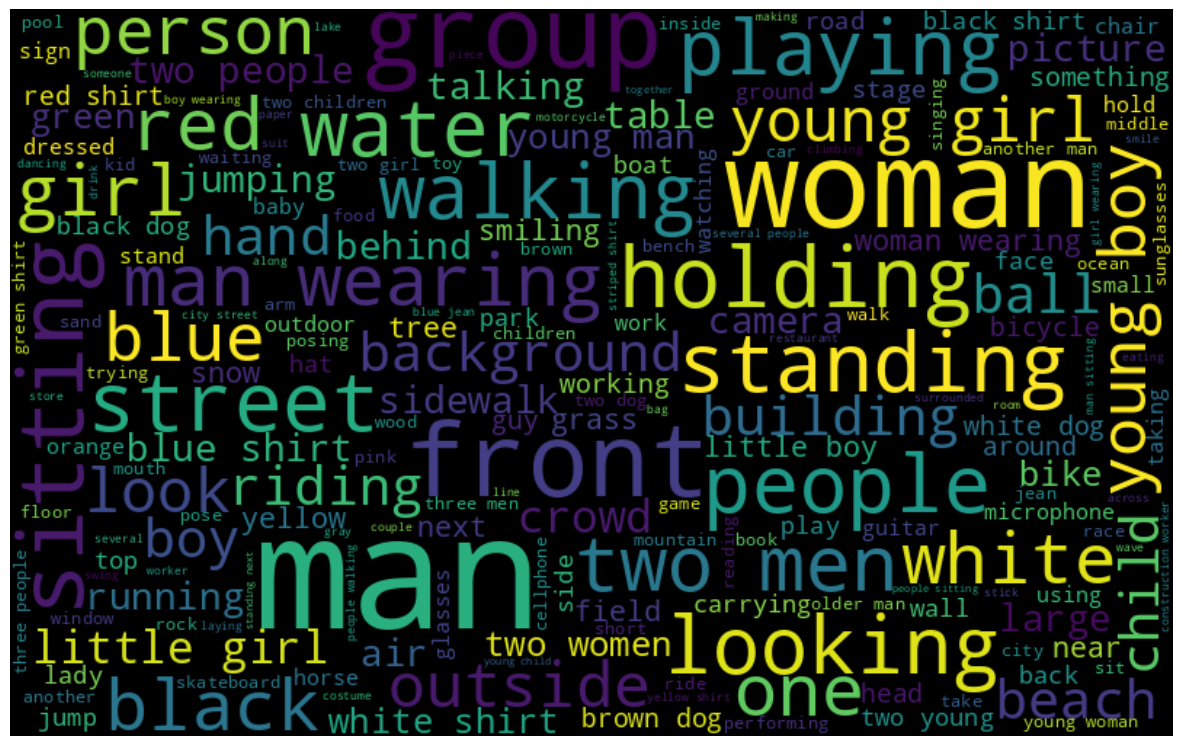

In [ ]:

print("Dataset shape:", dataset.shape)
print("Dataset info:")
print(dataset.info())
print(dataset.head())

dataset['comment_length'] = dataset['comment'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.show()
all_words = ' '.join([text for text in dataset['comment']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

if 'sentiment' in dataset.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='sentiment', data=dataset)
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

In [ ]:
sample_fraction = 0.1
eda_dataset = dataset.sample(frac=sample_fraction)

In [ ]:

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

cpu


In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")
batch_size = 32
results = []
for i in range(0, len(dataset['comment']), batch_size):
    batch = dataset['comment'].iloc[i:i+batch_size].tolist()
    batch_results = sentiment_pipeline(batch)
    results.extend(batch_results)
dataset['sentiment'] = [result['label'] for result in results]
print(dataset.head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

           image_name  comment_number  \
91865  4093746088.jpg               0   
52690  3024172109.jpg               0   
48136  2906755876.jpg               1   
742     104835889.jpg               2   
89948  4001021645.jpg               3   

                                                 comment  comment_length  \
91865  this man with a white hard hat , and gray vest...             100   
52690  there is a boy wearing jeans and a baseball ca...              68   
48136  white woman and boy sitting around a small whi...              83   
742    a guy with a sword and traditional fighting ge...              79   
89948  the wheel of the bus is being held by a person...              65   

      sentiment  
91865  NEGATIVE  
52690  POSITIVE  
48136  NEGATIVE  
742    POSITIVE  
89948  NEGATIVE  


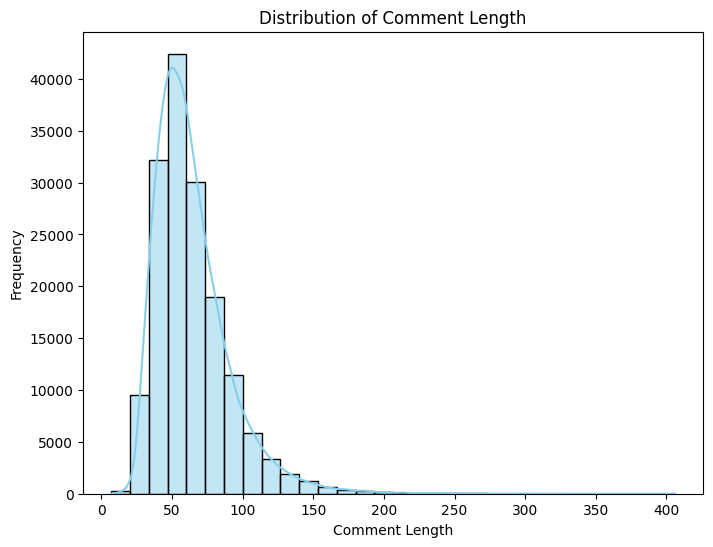

<ipython-input-7-5779dd8c098a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='sentiment', palette='pastel')


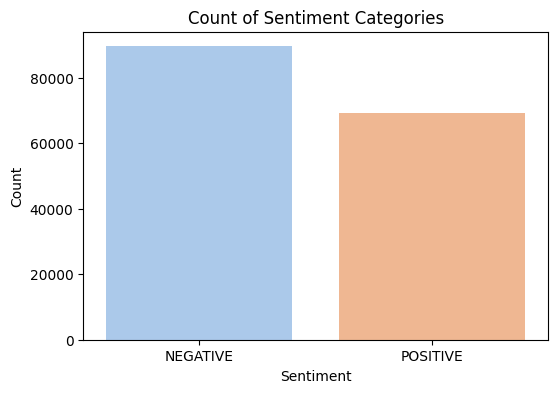

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['comment_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='sentiment', palette='pastel')
plt.title('Count of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
pip install scikit-learn

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(dataset['comment']).toarray()
y = dataset['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.7383821539816883

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.73      0.83      0.78     17740
    POSITIVE       0.75      0.62      0.68     14043

    accuracy                           0.74     31783
   macro avg       0.74      0.73      0.73     31783
weighted avg       0.74      0.74      0.73     31783



In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(dataset['comment']).toarray()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['sentiment'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.74867067300129

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79     17740
           1       0.77      0.62      0.69     14043

    accuracy                           0.75     31783
   macro avg       0.75      0.74      0.74     31783
weighted avg       0.75      0.75      0.74     31783



In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)
prompt = "Describe a winter jacket that is both stylish and warm."
generated_text = gpt2_generator(prompt, max_length=250, truncation=True)
print(generated_text[0]["generated_text"])

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Describe a winter jacket that is both stylish and warm.

This winter jacket comes with one piece of wool or fleece on the back that can be rolled to fit any length.

A simple knit and crochet stitch in the centre of the front of the jacket helps you to make the winter jacket from the back down.

This winter jacket comes with the addition of its own unique weave which has a lightweight fabric which helps you to get the best winter look.

The fleece allows you to wear winter clothing with a very simple look and even a little pull down sweater (for example a short long hat on low waist), while a soft and woolen, lace and collared pair of knit sweaters is what help keep your winter clothes warm.

In our book we include you to discover more about our products so you can make it your own dream winter garment.

Sleeveless Winter Jackets

This stylish autumn or winter wardrobe is a combination of our soft in-shell and soft elastic winter jacket.

The warmth is provided when these in-shell-like

In [ ]:
sentiment_analyzer = pipeline("sentiment-analysis")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

def generate_text_based_on_sentiment(image_description):
    sentiment_result = sentiment_analyzer(image_description)
    sentiment = sentiment_result[0]['label']
    sentiment_prefix = "The scene is very positive and " if sentiment == "POSITIVE" else "The scene is quite negative and "
    prompt = sentiment_prefix + image_description
    generated_text = text_generator(prompt, max_length=250, truncation=True)
    return generated_text[0]['generated_text']

image_description = "Describe a winter jacket that is both stylish and warm."
generated_text = generate_text_based_on_sentiment(image_description)
print(generated_text)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The scene is very positive and Describe a winter jacket that is both stylish and warm.

Amber: The jacket has no holes and the inside is free of clothing if it is a winter wind. This is very ideal for a winter coat.

This is very ideal for a winter coat. Amber: I love the colorway and the color combination. It makes the day look white.

Dakota is gorgeous and is one of the coolest. It's easy to set it to your preference on the weather person.

I love the colorway and the color combination. It makes the day look white. Jakka: It's always hard to choose. I'd rather have the white-toned version and prefer to have the color white or that. This can be used as you see.

I'm really looking forward to seeing this for myself soon.

Krazey: Very good looking jacket, I'm very pleased!

Very good looking jacket, I'm very pleased! Amber: I have always liked the colors and that is my main recommendation for the jacket. It looks good, the pattern looks good, has quite something to indicate the wind a

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
updated_dataset_path = '/content/sample_data/updated_dataset.csv'
dataset.to_csv(updated_dataset_path, index=False)

In [ ]:
dataset_path = '/content/results.csv'
dataset = pd.read_csv(dataset_path, delimiter='|')
dataset.columns = dataset.columns.str.strip()
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
def get_sentiment(comment):
    try:
        result = sentiment_pipeline(comment)
        return result[0]['label']
    except Exception:
        return 'Neutral'

dataset['sentiment'] = dataset['comment'].apply(get_sentiment)
updated_dataset_path = '/content/sample_data/updated_dataset.csv'
dataset.to_csv(updated_dataset_path, index=False)

In [ ]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
pip install torch transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.1+cu121
    Uninstalling torch-2.2.1+cu121:
      Successfully uninstalled torch-2.2.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.1+cu121 requires torch==2.2.1, but you have torch 

In [ ]:
encoder = LabelEncoder()
data['sentiment'] = encoder.fit_transform(data['sentiment'])

def tokenize_and_encode(examples):
    result = tokenizer(examples['comment'], truncation=True, padding='max_length', max_length=MAX_LENGTH)
    result['labels'] = list(examples['sentiment'])
    return result

train_data, test_data = train_test_split(data, test_size=0.2)
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)
train_dataset = train_dataset.map(tokenize_and_encode, batched=True)
test_dataset = test_dataset.map(tokenize_and_encode, batched=True)

Map:   0%|          | 0/127132 [00:00<?, ? examples/s]

Map:   0%|          | 0/31783 [00:00<?, ? examples/s]

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors='pt')


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=None
)

trainer.train()
results = trainer.evaluate()
print("Evaluation Results:", results)

Epoch,Training Loss,Validation Loss
1,0.236400,0.208453
2,0.165500,0.229407
3,0.101800,0.306847


Evaluation Results: {'eval_loss': 0.20845265686511993, 'eval_runtime': 59.3743, 'eval_samples_per_second': 535.299, 'eval_steps_per_second': 8.371, 'epoch': 3.0}


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')  # Adjusted for multiclass
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

results = trainer.evaluate()
print("Evaluation Results with Adjusted Metrics:", results)

Evaluation Results with Adjusted Metrics: {'eval_loss': 0.20845265686511993, 'eval_accuracy': 0.9110530786898656, 'eval_f1': 0.9108193767420242, 'eval_precision': 0.911246301970983, 'eval_recall': 0.9110530786898656, 'eval_runtime': 57.5524, 'eval_samples_per_second': 552.245, 'eval_steps_per_second': 8.636}
